In [2]:
library(readr)
github= "https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/chlorophyll_contents_on_leaves.csv"
dataA= data.frame(read_csv(url(github),show_col_types= FALSE))
head(dataA,10)

,Location,Genotype,Treatment,Days_after_planting,Chlorophyll_contents,Chlorophyll_contents_Std_error,Loss_of_greenness_on_leaves,Loss_of_greenness_on_leaves_Std_error
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Northern area,CV1,Control,21,44.64,1.81,0.03,0.02
2,Northern area,CV1,Control,22,43.50,2.81,0.05,0.02
3,Northern area,CV1,Control,23,42.35,3.81,0.06,0.02
4,Northern area,CV1,Control,24,41.21,4.81,0.08,0.02
5,Northern area,CV1,Control,25,40.06,5.81,0.09,0.03
6,Northern area,CV1,Control,26,38.92,6.81,0.11,0.03
7,Northern area,CV1,Control,27,37.77,1.72,0.13,0.03
8,Northern area,CV1,Control,28,37.52,1.75,0.23,0.03
9,Northern area,CV1,Control,29,34.33,2.75,0.29,0.03


In [3]:
str(dataA)

'data.frame':	240 obs. of  8 variables:
 $ Location                             : chr  "Northern area" "Northern area" "Northern area" "Northern area" ...
 $ Genotype                             : chr  "CV1" "CV1" "CV1" "CV1" ...
 $ Treatment                            : chr  "Control" "Control" "Control" "Control" ...
 $ Days_after_planting                  : num  21 22 23 24 25 26 27 28 29 30 ...
 $ Chlorophyll_contents                 : num  44.6 43.5 42.4 41.2 40.1 ...
 $ Chlorophyll_contents_Std_error       : num  1.81 2.81 3.81 4.81 5.81 6.81 1.72 1.75 2.75 3.75 ...
 $ Loss_of_greenness_on_leaves          : num  0.03 0.05 0.06 0.08 0.09 0.11 0.13 0.23 0.29 0.34 ...
 $ Loss_of_greenness_on_leaves_Std_error: num  0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 ...


In [6]:
table(dataA$Location, dataA$Treatment)

               
                Control Stress_1 Stress_2
  Northern area      40       40       40
  Southern area      40       40       40

In [7]:
North_CV1_control= subset(dataA, Location=="Northern area" & Genotype=="CV1" & Treatment=="Control")
North_CV1_stress1= subset(dataA, Location=="Northern area" & Genotype=="CV1" & Treatment=="Stress_1")
North_CV1_stress2= subset(dataA, Location=="Northern area" & Genotype=="CV1" & Treatment=="Stress_2")

North_CV2_control= subset(dataA, Location=="Northern area" & Genotype=="CV2" & Treatment=="Control")
North_CV2_stress1= subset(dataA, Location=="Northern area" & Genotype=="CV2" & Treatment=="Stress_1")
North_CV2_stress2= subset(dataA, Location=="Northern area" & Genotype=="CV2" & Treatment=="Stress_2")

South_CV1_control= subset(dataA, Location=="Southern area" & Genotype=="CV1" & Treatment=="Control")
South_CV1_stress1= subset(dataA, Location=="Southern area" & Genotype=="CV1" & Treatment=="Stress_1")
South_CV1_stress2= subset(dataA, Location=="Southern area" & Genotype=="CV1" & Treatment=="Stress_2")

South_CV2_control= subset(dataA, Location=="Southern area" & Genotype=="CV2" & Treatment=="Control")
South_CV2_stress1= subset(dataA, Location=="Southern area" & Genotype=="CV2" & Treatment=="Stress_1")
South_CV2_stress2= subset(dataA, Location=="Southern area" & Genotype=="CV2" & Treatment=="Stress_2")

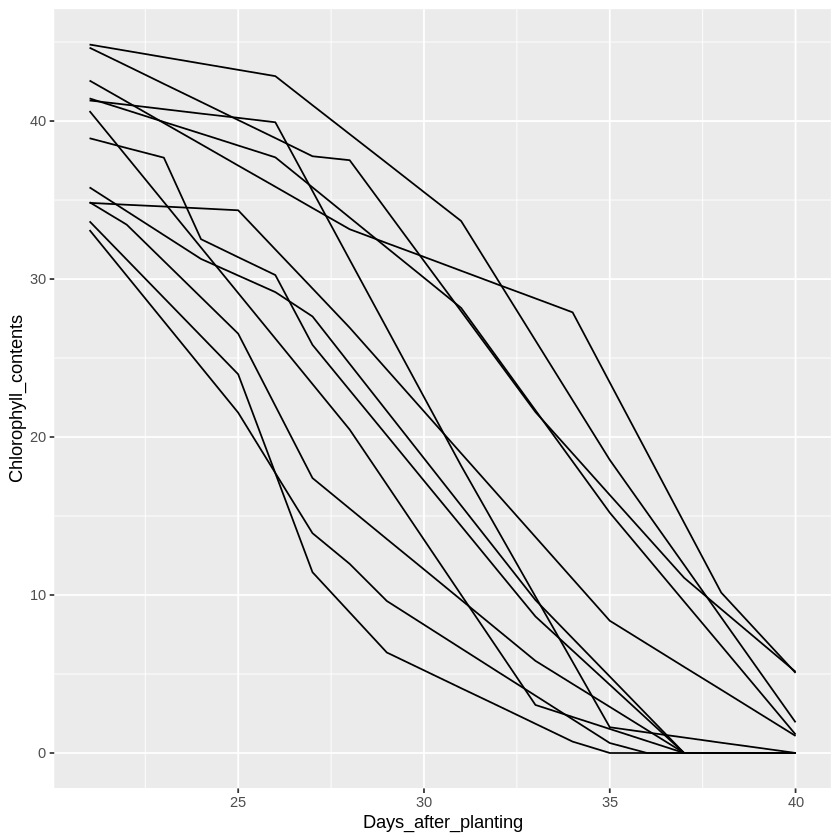

In [9]:
library(ggplot2)
ggplot() +
  geom_line(data=North_CV1_control, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=North_CV1_stress1, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=North_CV1_stress2, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=North_CV2_control, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=North_CV2_stress1, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=North_CV2_stress2, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=South_CV1_control, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=South_CV1_stress1, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=South_CV1_stress2, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=South_CV2_control, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=South_CV2_stress1, aes(x=Days_after_planting,y=Chlorophyll_contents)) +
  geom_line(data=South_CV2_stress2, aes(x=Days_after_planting,y=Chlorophyll_contents))

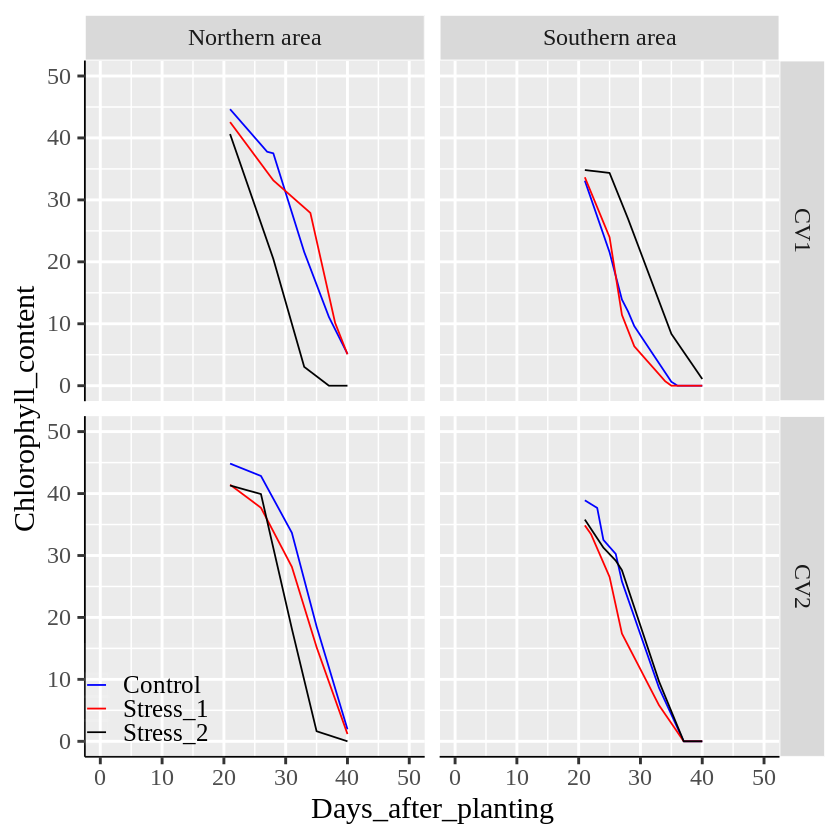

In [12]:
ggplot() +
  geom_line(data=dataA, aes(x=Days_after_planting, y=Chlorophyll_contents, color=Treatment)) +
  scale_color_manual(values= c("blue","red","black"))+
  facet_grid (~Genotype ~ Location) +
  scale_x_continuous(breaks=seq(0,50,10), limits = c(0,50)) +
  scale_y_continuous(breaks=seq(0,50,10), limits = c(0,50)) +
  labs(x="Days_after_planting", y="Chlorophyll_content") +
  theme_grey(base_size=18, base_family="serif")+
  theme(legend.position=c(0.09,0.08),
        legend.title=element_blank(),
        legend.key.size=unit(0.5,'cm'),
        legend.key=element_rect(color=alpha("white",.05), fill=alpha("white",.05)),
        legend.text=element_text(size=15),
        legend.background= element_rect(fill=alpha("white",.05)),
        strip.background=element_rect(color="white", size=0.5,linetype="solid"),
        axis.line=element_line(linewidth=0.5, colour="black"))

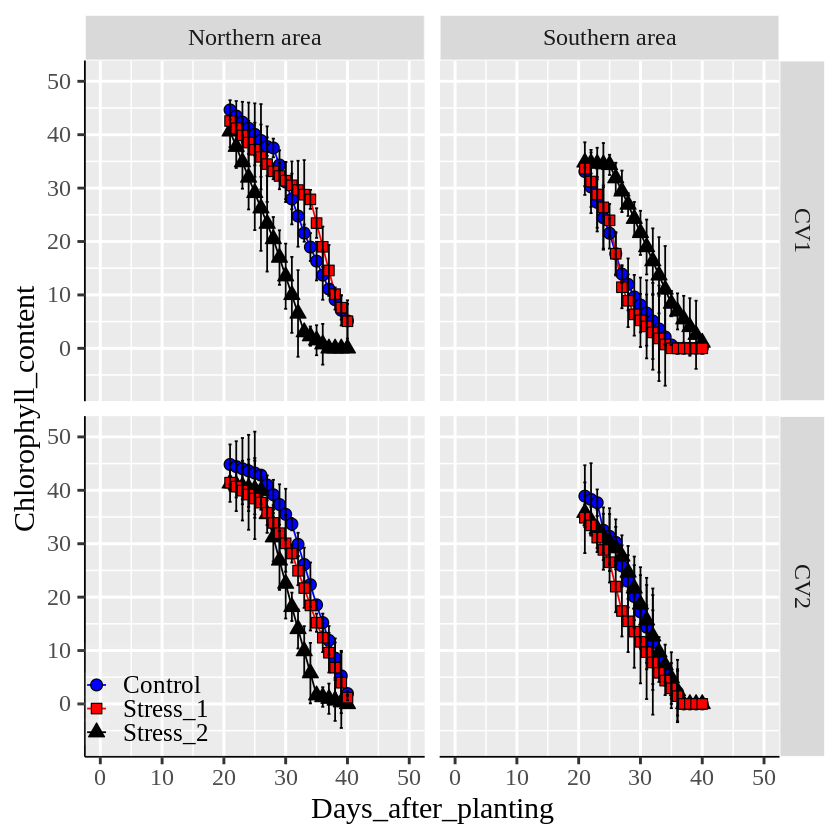

In [13]:
ggplot(data=dataA, aes(x=Days_after_planting, y=Chlorophyll_contents)) +
  geom_line(data=dataA, aes(x=Days_after_planting, y=Chlorophyll_contents, color=Treatment)) +
  geom_point(aes(fill=Treatment, shape=Treatment), color="black", size=3) +
  geom_errorbar(aes(ymin=Chlorophyll_contents-Chlorophyll_contents_Std_error,
                    ymax=Chlorophyll_contents+Chlorophyll_contents_Std_error),
                    position=position_dodge(0.7), width=0.5, color='Black') +
  scale_color_manual(values= c("blue","red","black"))+
  scale_fill_manual(values= c("blue","red","black"))+
  scale_shape_manual(values=c(21,22,24)) +
  facet_grid (~Genotype ~ Location) +
  scale_x_continuous(breaks=seq(0,50,10), limits = c(0,50)) +
  scale_y_continuous(breaks=c(0, 10, 20, 30, 40, 50))+
  labs(x="Days_after_planting", y="Chlorophyll_content") +
  theme_grey(base_size=18, base_family="serif")+
  theme(legend.position=c(0.09,0.08),
        legend.title=element_blank(),
        legend.key.size=unit(0.5,'cm'),
        legend.key=element_rect(color=alpha("white",.05), fill=alpha("white",.05)),
        legend.text=element_text(size=15),
        legend.background= element_rect(fill=alpha("white",.05)),
        strip.background=element_rect(color="white", size=0.5,linetype="solid"),
        axis.line=element_line(linewidth=0.5, colour="black"))